In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.utils import resample

In [ ]:
import kagglehub
import os
import glob

path = kagglehub.dataset_download("crainbramp/steam-dataset-2025-multi-modal-gaming-analytics")
search_path = os.path.join(path, "**", "applications.csv")
files_found = glob.glob(search_path, recursive=True)

dir = os.path.dirname(files_found[0])
print(f"Diretório base dos CSVs identificado: {dir}")



Using Colab cache for faster access to the 'steam-dataset-2025-multi-modal-gaming-analytics' dataset.
Diretório base dos CSVs identificado: /kaggle/input/steam-dataset-2025-multi-modal-gaming-analytics/steam_dataset_2025_csv_package_v1/steam_dataset_2025_csv


/tmp/ipython-input-757975404.py:16: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, "applications.csv"))


,appid,name,type,is_free,release_date,required_age,short_description,supported_languages,header_image,background,...,mat_pc_os_min,mat_pc_processor_min,mat_pc_memory_min,mat_pc_graphics_min,mat_pc_os_rec,mat_pc_processor_rec,mat_pc_memory_rec,mat_pc_graphics_rec,created_at,updated_at
0,10,Counter-Strike,game,False,2000-11-01,0,Play the world's number 1 online action game. ...,"English<strong>*</strong>, French<strong>*</st...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
1,20,Team Fortress Classic,game,False,1999-04-01,0,One of the most popular online action games of...,"English, French, German, Italian, Spanish - Sp...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
2,30,Day of Defeat,game,False,2003-05-01,0,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
3,40,Deathmatch Classic,game,False,2001-06-01,0,Enjoy fast-paced multiplayer gaming with Death...,"English, French, German, Italian, Spanish - Sp...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
4,50,Half-Life: Opposing Force,game,False,1999-11-01,0,Return to the Black Mesa Research Facility as ...,"English, French, German, Korean",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00


In [ ]:
df = pd.read_csv(os.path.join(dir, "applications.csv"))

df.head()

/tmp/ipython-input-3248271671.py:1: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(os.path.join(dir, "applications.csv"))


,appid,name,type,is_free,release_date,required_age,short_description,supported_languages,header_image,background,...,mat_pc_os_min,mat_pc_processor_min,mat_pc_memory_min,mat_pc_graphics_min,mat_pc_os_rec,mat_pc_processor_rec,mat_pc_memory_rec,mat_pc_graphics_rec,created_at,updated_at
0,10,Counter-Strike,game,False,2000-11-01,0,Play the world's number 1 online action game. ...,"English<strong>*</strong>, French<strong>*</st...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
1,20,Team Fortress Classic,game,False,1999-04-01,0,One of the most popular online action games of...,"English, French, German, Italian, Spanish - Sp...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
2,30,Day of Defeat,game,False,2003-05-01,0,Enlist in an intense brand of Axis vs. Allied ...,"English, French, German, Italian, Spanish - Spain",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
3,40,Deathmatch Classic,game,False,2001-06-01,0,Enjoy fast-paced multiplayer gaming with Death...,"English, French, German, Italian, Spanish - Sp...",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00
4,50,Half-Life: Opposing Force,game,False,1999-11-01,0,Return to the Black Mesa Research Facility as ...,"English, French, German, Korean",https://shared.akamai.steamstatic.com/store_it...,https://store.akamai.steamstatic.com/images/st...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2025-09-07 16:27:12.218587+00:00,2025-09-29 02:01:37.107239+00:00


Limpando coluna: required_age...
Limpando coluna: mat_final_price...
Limpando coluna: mat_achievement_count...
Filtrando dataset para usar apenas a moeda: USD
Definição de Sucesso: Mais de 361.0 recomendações.
Total de instâncias limpas e prontas: 142570

Treinando Random Forest...
Treinando MLP (Rede Neural)...

--- RELATÓRIO: RANDOM FOREST ---
              precision    recall  f1-score   support

           0       0.94      0.99      0.96     39593
           1       0.58      0.22      0.32      3178

    accuracy                           0.93     42771
   macro avg       0.76      0.60      0.64     42771
weighted avg       0.91      0.93      0.92     42771



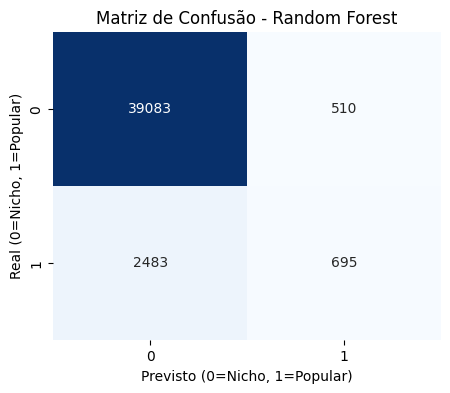


--- RELATÓRIO: MLP (REDE NEURAL) ---
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     39593
           1       0.68      0.21      0.32      3178

    accuracy                           0.93     42771
   macro avg       0.81      0.60      0.64     42771
weighted avg       0.92      0.93      0.92     42771



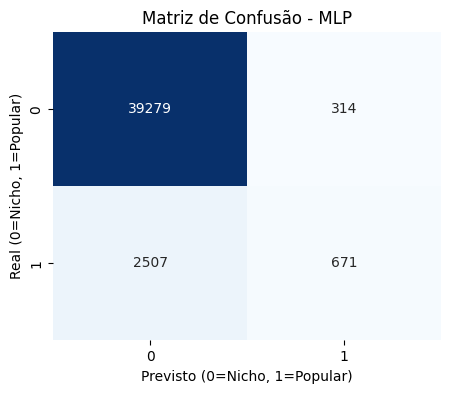

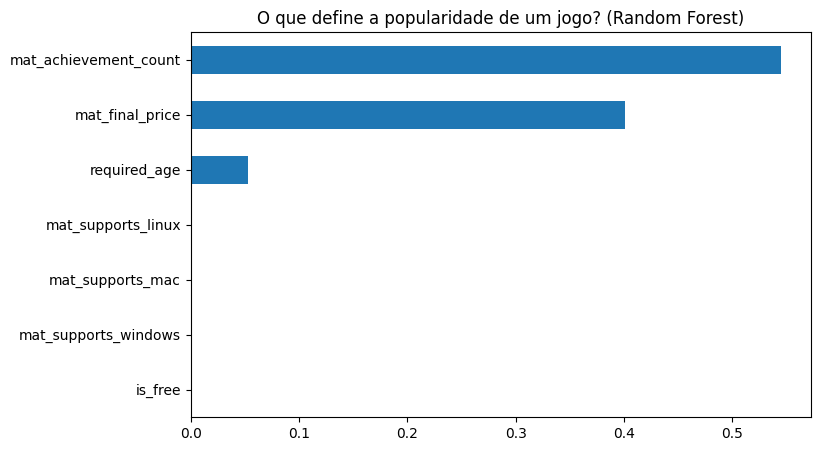

In [ ]:
cols_to_fix = ['required_age', 'mat_final_price', 'mat_achievement_count']

for col in cols_to_fix:
    print(f"Limpando coluna: {col}...")
    df[col] = pd.to_numeric(df[col], errors='coerce')

df = df.dropna(subset=['mat_currency'])
moeda_principal = df['mat_currency'].mode()[0]
print(f"Filtrando dataset para usar apenas a moeda: {moeda_principal}")
df_clean = df[df['mat_currency'] == moeda_principal].copy()

features_cols = [
    'mat_final_price',
    'mat_achievement_count',
    'is_free',
    'mat_supports_windows',
    'mat_supports_mac',
    'mat_supports_linux',
    'required_age'
]

X = df_clean[features_cols].fillna(0)

bool_cols = ['is_free', 'mat_supports_windows', 'mat_supports_mac', 'mat_supports_linux']
for col in bool_cols:
    X[col] = X[col].astype(int);

threshold = df_clean['recommendations_total'].median();
y = np.where(df_clean['recommendations_total'] > threshold, 1, 0);

print(f"Definição de Sucesso: Mais de {threshold} recomendações.");
print(f"Total de instâncias limpas e prontas: {len(X)}");

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42);

scaler = StandardScaler();
X_train_scaled = scaler.fit_transform(X_train);
X_test_scaled = scaler.transform(X_test);

print("\nTreinando Random Forest...");
rf = RandomForestClassifier(n_estimators=100, random_state=42);
rf.fit(X_train, y_train);
y_pred_rf = rf.predict(X_test);

print("Treinando MLP (Rede Neural)...");
mlp = MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=1000, random_state=42);
mlp.fit(X_train_scaled, y_train);
y_pred_mlp = mlp.predict(X_test_scaled);

def plot_confusion_matrix(y_test, y_pred, title):
    cm = confusion_matrix(y_test, y_pred);
    plt.figure(figsize=(5, 4));
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False);
    plt.xlabel('Previsto (0=Nicho, 1=Popular)');
    plt.ylabel('Real (0=Nicho, 1=Popular)');
    plt.title(title);
    plt.show();

print("\n--- RELATÓRIO: RANDOM FOREST ---");
print(classification_report(y_test, y_pred_rf));
plot_confusion_matrix(y_test, y_pred_rf, "Matriz de Confusão - Random Forest");

print("\n--- RELATÓRIO: MLP (REDE NEURAL) ---");
print(classification_report(y_test, y_pred_mlp));
plot_confusion_matrix(y_test, y_pred_mlp, "Matriz de Confusão - MLP");

plt.figure(figsize=(8, 5));
feature_importances = pd.Series(rf.feature_importances_, index=features_cols);
feature_importances.sort_values().plot(kind='barh');
plt.title("O que define a popularidade de um jogo? (Random Forest)");
plt.show();